# my-jovian-project

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="my-jovian-project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/toyoski/my-jovian-project


'https://jovian.ai/toyoski/my-jovian-project'

In [5]:
!pip install pandas numpy matplotlib seaborn plotly --quiet

In [6]:
!pip install opendatasets scikit-learn --quiet --upgrade

     |████████████████████████████████| 22.3 MB 79.3 MB/s 


In [7]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

The dataset is available at https://www.kaggle.com/c/DontGetKicked.


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [8]:
od.download('https://www.kaggle.com/c/DontGetKicked')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: matthewoladiran
Your Kaggle Key: ··········


100%|██████████| 10.2M/10.2M [00:00<00:00, 100MB/s]


Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


The dataset is downloaded and extracted to the folder `DontGetKicked`.

In [9]:
os.listdir('DontGetKicked')

['training.csv',
 'test.csv',
 'training.zip',
 'test.zip',
 'Carvana_Data_Dictionary.txt',
 'example_entry.csv']

In [10]:
train_df = pd.read_csv('./DontGetKicked/training.csv')
test_df = pd.read_csv('./DontGetKicked/test.csv')
entry_df = pd.read_csv('./DontGetKicked/example_entry.csv')

In [11]:
train_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [12]:
test_df

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,1.0,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,2.0,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,1.0,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


In [13]:
entry_df

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              48707 non-null  int64  
 1   PurchDate                          48707 non-null  object 
 2   Auction                            48707 non-null  object 
 3   VehYear                            48707 non-null  int64  
 4   VehicleAge                         48707 non-null  int64  
 5   Make                               48707 non-null  object 
 6   Model                              48707 non-null  object 
 7   Trim                               47157 non-null  object 
 8   SubModel                           48702 non-null  object 
 9   Color                              48703 non-null  object 
 10  Transmission                       48704 non-null  object 
 11  WheelTypeID                        46519 non-null  flo

In [16]:
train_df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


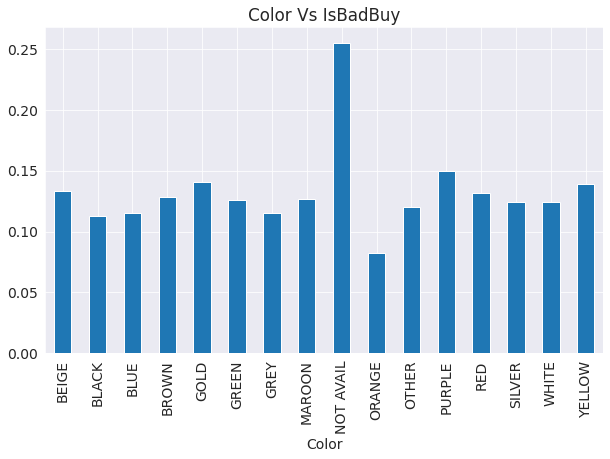

In [17]:
train_df.groupby("Color").mean()["IsBadBuy"].plot.bar(title = "Color Vs IsBadBuy")
plt.show()

In [18]:
print(train_df.groupby("IsBadBuy").size())

IsBadBuy
0    64007
1     8976
dtype: int64


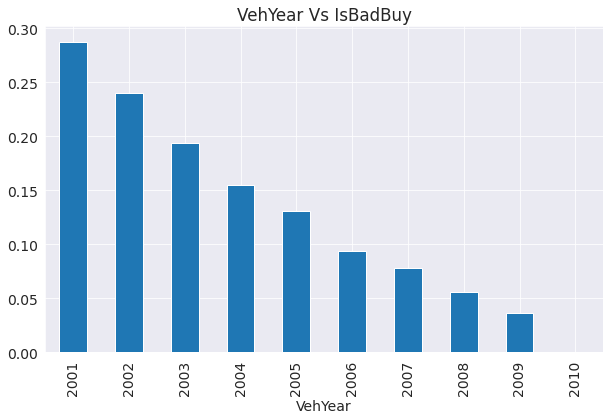

In [19]:
train_df.groupby("VehYear").mean()["IsBadBuy"].plot.bar(title = "VehYear Vs IsBadBuy")
plt.show()

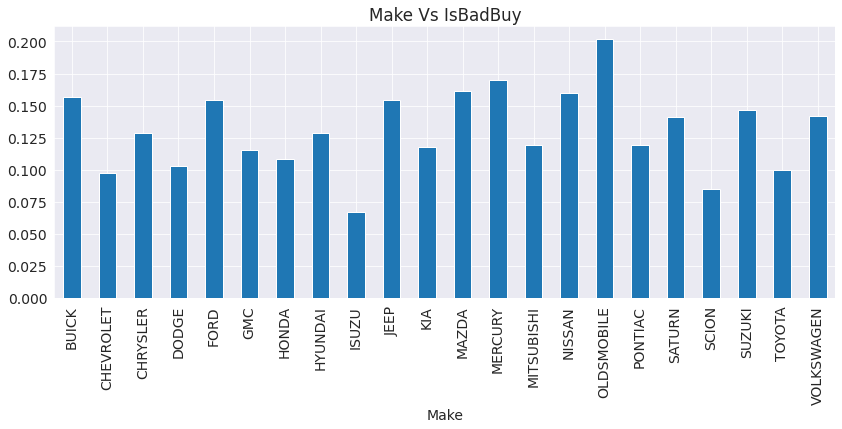

In [20]:
train_df.groupby('Make').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot.bar(figsize=(14,5), title = "Make Vs IsBadBuy")
plt.show()

In [21]:
train_df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [22]:
train_df.corr()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,0.023973,0.010580,-0.025404,0.013110,-0.026553,-0.011568,-0.015704,-0.032208,-0.034324,-0.008742,-0.013015,-0.021616,-0.024369,0.032896,0.131898,-0.011873,-0.048851,-0.023478
IsBadBuy,0.023973,1.000000,-0.158886,0.167164,-0.044620,0.082560,-0.109252,-0.102954,-0.087418,-0.083665,-0.109112,-0.104020,-0.103914,-0.100245,-0.061488,0.005796,-0.099911,-0.003697,0.052319
VehYear,0.010580,-0.158886,1.000000,-0.957957,0.259660,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.280791,0.068276,0.349965,0.057380,-0.268696
VehicleAge,-0.025404,0.167164,-0.957957,1.000000,-0.250801,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,0.013110,-0.044620,0.259660,-0.250801,1.000000,-0.213558,-0.095471,-0.129597,-0.072700,-0.102019,-0.088597,-0.121211,-0.074420,-0.102488,0.187199,0.007901,-0.162826,-0.006747,-0.132798
VehOdo,-0.026553,0.082560,-0.283719,0.319794,-0.213558,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.011568,-0.109252,0.581146,-0.565690,-0.095471,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.015704,-0.102954,0.532927,-0.518810,-0.129597,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.062502,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.032208,-0.087418,0.581191,-0.460854,-0.072700,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.034324,-0.083665,0.539230,-0.426382,-0.102019,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.069676,0.031284,0.744966,0.077670,-0.026933


In [23]:
train_df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [24]:
#import train_test_split library
from sklearn.model_selection import train_test_split

# create train test split
training_df, testing_df= train_test_split( train_df, test_size=0.3, random_state=0)

In [25]:
training_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
42047,42070,1,8/12/2009,OTHER,2005,4,CHRYSLER,SEBRING V6 2.7L V6 M,Tou,4D SEDAN LX,BLACK,AUTO,NaN,NaN,91090,AMERICAN,MEDIUM,CHRYSLER,4478.0,5206.0,5336.0,6122.0,4478.0,5206.0,5336.0,6122.0,NaN,NaN,17675,27407,NC,3815.0,0,1485
15047,15057,0,7/15/2009,MANHEIM,2007,2,FORD,FUSION 4C 2.3L I4 EF,S,4D SEDAN S,BEIGE,AUTO,1.0,Alloy,79688,AMERICAN,MEDIUM,FORD,8123.0,9919.0,9273.0,11213.0,7545.0,9206.0,8649.0,10442.0,NaN,NaN,23359,94544,CA,7525.0,0,803
64045,64076,0,11/11/2009,ADESA,2007,2,CHRYSLER,PACIFICA FWD,Bas,4D SPORT,SILVER,AUTO,1.0,Alloy,65371,AMERICAN,CROSSOVER,CHRYSLER,9453.0,11374.0,10709.0,12784.0,8875.0,10790.0,12848.0,14872.0,NaN,NaN,21053,85226,AZ,8495.0,0,1215
22202,22218,0,8/19/2009,MANHEIM,2003,6,CHEVROLET,1500 SILVERADO PICKU,W/T,EXT CAB 5.3L LS,WHITE,AUTO,1.0,Alloy,83272,AMERICAN,LARGE TRUCK,GM,6549.0,8108.0,7573.0,9257.0,4920.0,6640.0,5814.0,7671.0,NaN,NaN,23359,92807,CA,9170.0,0,1543
1386,1388,0,11/30/2010,ADESA,2007,3,TOYOTA,TUNDRA PICKUP 2WD V8,Bas,REG CAB 4.7L,SILVER,AUTO,1.0,Alloy,93095,TOP LINE ASIAN,LARGE TRUCK,OTHER,14810.0,16340.0,19467.0,21100.0,12568.0,14413.0,16528.0,18465.0,NO,GREEN,18111,38118,TN,9450.0,0,765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,21258,0,12/8/2010,MANHEIM,2005,5,DODGE,NEON,SXT,4D SEDAN,BLUE,AUTO,1.0,Alloy,42735,AMERICAN,COMPACT,CHRYSLER,3109.0,4171.0,5966.0,7302.0,3123.0,4082.0,5994.0,6986.0,NaN,NaN,52644,75236,TX,5325.0,0,553
45891,45915,0,12/2/2009,MANHEIM,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 5.7L,WHITE,AUTO,1.0,Alloy,86634,AMERICAN,LARGE TRUCK,CHRYSLER,6680.0,8319.0,7714.0,9485.0,7062.0,8453.0,11314.0,12511.0,NaN,NaN,18822,64161,MO,8175.0,0,983
42613,42637,0,10/14/2010,MANHEIM,2005,5,PONTIAC,SUNFIRE,NaN,2D COUPE SE,BLUE,AUTO,2.0,Covers,79130,AMERICAN,COMPACT,GM,3373.0,4402.0,6472.0,7891.0,3296.0,4337.0,7009.0,9223.0,NaN,NaN,18880,29532,SC,5470.0,0,1155
43567,43591,0,8/26/2009,MANHEIM,2003,6,OLDSMOBILE,ALERO 4C 2.2L I4 MPI,GL,4D SEDAN GL2,GREY,AUTO,2.0,Covers,94501,AMERICAN,MEDIUM,GM,2880.0,4195.0,3610.0,5031.0,3034.0,4413.0,3777.0,5266.0,NaN,NaN,16044,22801,VA,4200.0,0,2074


In [26]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21895 entries, 71921 to 48273
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              21895 non-null  int64  
 1   IsBadBuy                           21895 non-null  int64  
 2   PurchDate                          21895 non-null  object 
 3   Auction                            21895 non-null  object 
 4   VehYear                            21895 non-null  int64  
 5   VehicleAge                         21895 non-null  int64  
 6   Make                               21895 non-null  object 
 7   Model                              21895 non-null  object 
 8   Trim                               21213 non-null  object 
 9   SubModel                           21894 non-null  object 
 10  Color                              21894 non-null  object 
 11  Transmission                       21894 non-null 

In [27]:
input_cols = ['Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']
target_col = 'IsBadBuy'

In [28]:
train_inputs = training_df[input_cols].copy()
train_targets = training_df[target_col].copy()

In [29]:
test_inputs = testing_df[input_cols].copy()
test_targets = testing_df[target_col].copy()

In [30]:
dtest_inputs = test_df[input_cols].copy()

Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.



In [31]:
numeric_cols =train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [32]:
print(numeric_cols)

['VehYear', 'VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']


In [33]:
print(categorical_cols)

['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST']


### Impute missing numerical data

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imputer = SimpleImputer(strategy = 'median').fit(train_df[numeric_cols])

In [36]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [37]:
dtest_inputs[numeric_cols]

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
0,2005,4,85377,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,18881,30212,6500.0,0,2152
1,2005,4,61873,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,18111,30212,6300.0,0,1118
2,2006,3,69283,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,18111,30212,9700.0,0,1215
3,2002,7,87889,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,18881,30212,4150.0,0,1933
4,2007,2,73432,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,18111,30212,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,2005,5,88645,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,20928,33411,7955.0,0,1633
48703,2007,3,81862,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,20928,33411,7035.0,0,594
48704,2006,4,82451,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,20928,33411,6335.0,0,594
48705,2005,5,75760,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,20928,33411,8055.0,0,1038


In [38]:
imputers = SimpleImputer(strategy = 'median').fit(test_df[numeric_cols])

In [39]:
dtest_inputs[numeric_cols] = imputers.transform(dtest_inputs[numeric_cols])

In [40]:
train_inputs[numeric_cols].isna().sum()

VehYear                              0
VehicleAge                           0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                               0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [41]:
dtest_inputs[numeric_cols].isnull().sum()

VehYear                              0
VehicleAge                           0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                               0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [44]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
dtest_inputs[numeric_cols] = scaler.transform(dtest_inputs[numeric_cols])

### Encode Categorical Columns

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

Let's one-hot encode categorical columns.

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [47]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/toyoski/my-jovian-project


'https://jovian.ai/toyoski/my-jovian-project'

In [48]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
dtest_inputs[encoded_cols] = encoder.transform(dtest_inputs[categorical_cols])

In [49]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = test_inputs[numeric_cols + encoded_cols]
X_test = dtest_inputs[numeric_cols + encoded_cols]

In [50]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

In [51]:
%%time
model.fit(X_train, train_targets)

CPU times: user 16.7 s, sys: 259 ms, total: 17 s
Wall time: 16.9 s


DecisionTreeClassifier(random_state=0)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
train_preds = model.predict(X_train)

In [54]:
train_preds

array([1, 0, 0, ..., 0, 0, 0])

In [55]:
accuracy_score(train_targets, train_preds)

1.0

In [56]:
model.score(X_val, test_targets)

0.8345741036766385

In [57]:
from sklearn.tree import plot_tree, export_text

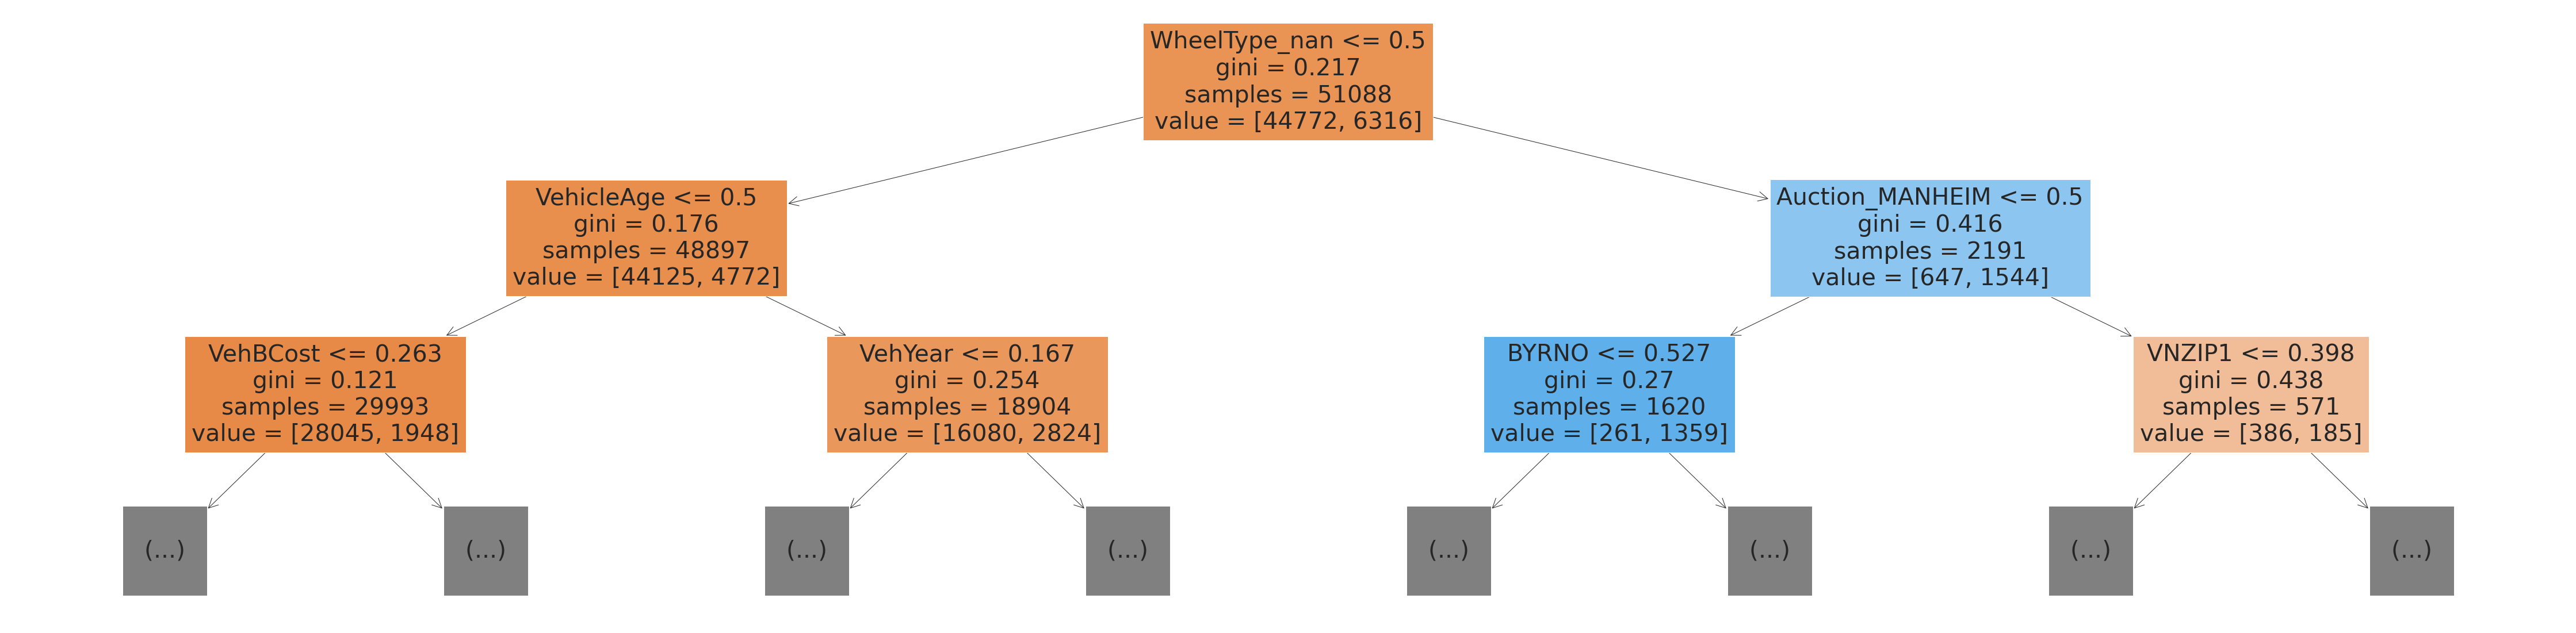

In [58]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [59]:
model.tree_.max_depth

103

In [60]:
model.feature_importances_

array([0.00636379, 0.01890466, 0.06782123, ..., 0.00161483, 0.00023681,
       0.00050239])

In [61]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [62]:
importance_df.head(10)

,feature,importance
2045,WheelType_nan,0.139639
2,VehOdo,0.067821
13,VehBCost,0.052303
12,VNZIP1,0.045093
11,BYRNO,0.038137
10,MMRCurrentRetailCleanPrice,0.036912
9,MMRCurrentRetailAveragePrice,0.034438
3,MMRAcquisitionAuctionAveragePrice,0.031590
7,MMRCurrentAuctionAveragePrice,0.029812
8,MMRCurrentAuctionCleanPrice,0.028847


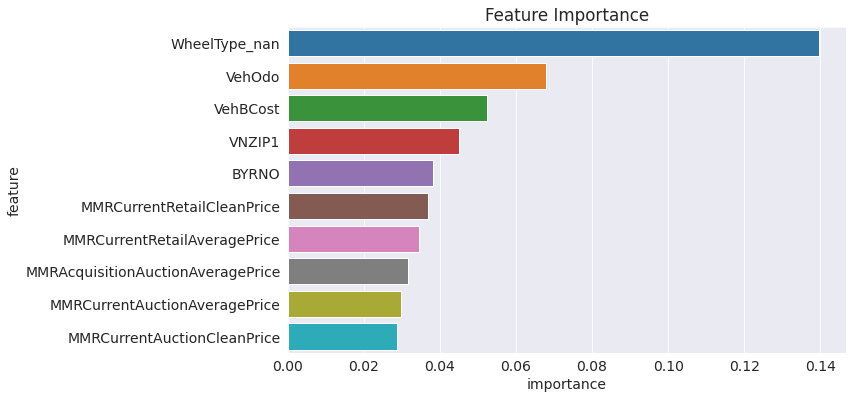

In [63]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [64]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/toyoski/my-jovian-project


'https://jovian.ai/toyoski/my-jovian-project'

Hyperparameter Tuning and Overfitting
As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as regularlization.

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

In [65]:
model = DecisionTreeClassifier(max_depth=5, random_state=0)

In [66]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [67]:
model.score(X_train, train_targets)

0.900270122142186

In [68]:
model.score(X_val, test_targets)

0.9028545329984015

In [69]:
model.classes_

array([0, 1])

In [70]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=0)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, test_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [71]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 1min 46s, sys: 218 ms, total: 1min 46s
Wall time: 1min 46s


In [72]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.106072,0.103083
1,2,0.102137,0.099703
2,3,0.101609,0.099064
3,4,0.100082,0.098333
4,5,0.099730,0.097145
5,6,0.098869,0.098013
6,7,0.097831,0.098424
7,8,0.096520,0.097968
8,9,0.094680,0.098013
9,10,0.092585,0.099018


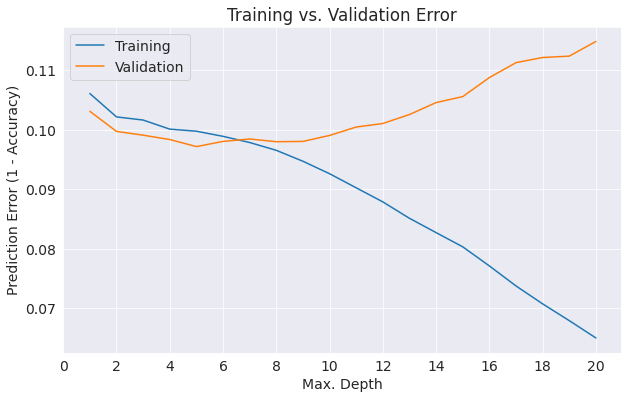

In [73]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">




You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 7 results in the lowest validation error.

In [74]:
model = DecisionTreeClassifier(max_depth=5, random_state=0).fit(X_train, train_targets)
model.score(X_val, test_targets)

0.9028545329984015

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [112]:
model = DecisionTreeClassifier(max_leaf_nodes=35, random_state=0)

In [113]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=35, random_state=0)

In [114]:
model.score(X_train, train_targets)

0.9011901033510805

In [115]:
model.score(X_val, test_targets)

0.903128568166248

In [79]:
model.tree_.max_depth

11

In [80]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- WheelType_nan <= 0.50
|   |--- VehicleAge <= 0.50
|   |   |--- VehBCost <= 0.26
|   |   |   |--- VehBCost <= 0.13
|   |   |   |   |--- VehOdo <= 0.47
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- VehOdo >  0.47
|   |   |   |   |   |--- class: 0
|   |   |   |--- VehBCost >  0.13
|   |   |   |   |--- VehicleAge <= 0.28
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- VehicleAge >  0.28
|   |   |   |   |   |--- class: 0
|   |   |--- VehBCost >  0.26
|   |   |   |--- class: 1
|   |--- VehicleAge >  0.50
|   |   |--- VehYear <= 0.17
|   |   |   |--- VehOdo <= 0.64
|   |   |   |   |--- class: 0
|   |   |   |--- VehOdo >  0.64
|   |   |   |   |--- MMRAcquisitionAuctionCleanPrice <= 0.15
|   |   |   |   |   |--- PRIMEUNIT_nan <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- PRIMEUNIT_nan >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- MMRAcquisitionAuctionCleanPrice >  0.15
|   |   |   |   |   |--- class: 0
|   |   |--- VehYear >  0.

In [81]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/toyoski/my-jovian-project


'https://jovian.ai/toyoski/my-jovian-project'

## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model. 

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

<img src="https://i.imgur.com/4Dg0XK4.png" width="480">

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model = RandomForestClassifier(n_jobs=2, random_state=0)

In [84]:

%%time
model.fit(X_train, train_targets)

CPU times: user 1min 33s, sys: 216 ms, total: 1min 34s
Wall time: 48.1 s


RandomForestClassifier(n_jobs=2, random_state=0)

In [85]:
model.score(X_train, train_targets)

1.0

In [86]:
model.score(X_val, test_targets)

0.8999314912080384

In [87]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.16, 0.84],
       [0.95, 0.05],
       [0.98, 0.02],
       ...,
       [0.99, 0.01],
       [0.91, 0.09],
       [0.98, 0.02]])

In [88]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=209652396)

In [89]:
len(model.estimators_)

100

In [90]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

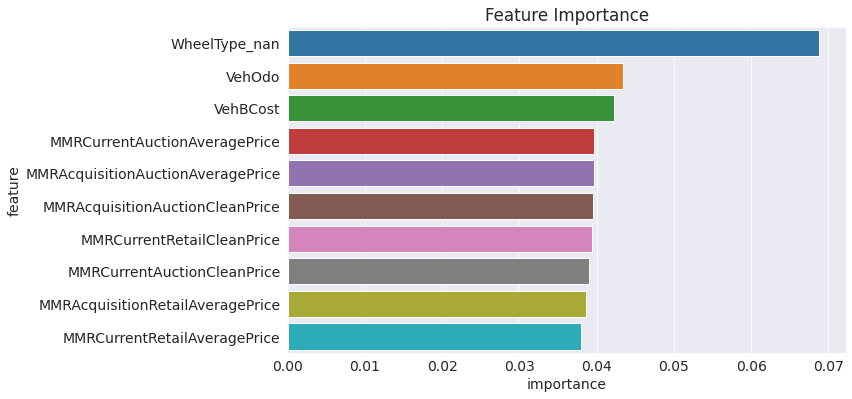

In [91]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [92]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/toyoski/my-jovian-project


'https://jovian.ai/toyoski/my-jovian-project'

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [93]:
base_model = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train, train_targets)

In [94]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, test_targets)

In [95]:
base_accs = base_train_acc, base_val_acc
base_accs

(1.0, 0.8999314912080384)

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. 


**200 estimators**

In [96]:
model = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=200)

In [97]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0)

In [98]:
model.score(X_train, train_targets), model.score(X_val, test_targets)

(1.0, 0.9002968714318338)

In [99]:
base_accs

(1.0, 0.8999314912080384)

In [100]:
model = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

In [101]:
model.score(X_train, train_targets)

1.0

In [102]:
model.score(X_val, test_targets)

0.9005252340717058

In [103]:
base_accs

(1.0, 0.8999314912080384)

In [109]:
def test_params(**params):
    model = RandomForestClassifier(random_state=0, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, test_targets)

In [110]:
test_params(max_depth=5)

(0.8763701847792045, 0.8785110755880338)

In [111]:
test_params(max_depth=35)

(0.9246202630754776, 0.8982416076729847)

In [107]:
test_params(max_leaf_nodes=2**5)

(0.876565925461948, 0.8785567481160083)

In [116]:
test_preds = model.predict(X_test)

In [117]:
entry_df['IsBadBuy']  = test_preds

In [118]:
entry_df

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,1
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


In [119]:
entry_df.to_csv('example_entry.csv', index=None)

In [120]:
jovian.submit(assignment="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/toyoski/my-jovian-project
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model
